('XTENSION', 'BINTABLE', 'Binary table written by MWRFITS v1.8')
('BITPIX', 8, 'Required value')
('NAXIS', 2, 'Required value')
('NAXIS1', 3145770, 'Number of bytes per row')
('NAXIS2', 25, 'Number of rows')
('PCOUNT', 0, 'Normally 0 (no varying arrays)')
('GCOUNT', 1, 'Required value')
('TFIELDS', 5, 'Number of columns in table')
('COMMENT', '', '')
('COMMENT', ' *** End of mandatory fields ***', '')
('COMMENT', '', '')
('COMMENT', '', '')
('COMMENT', ' *** Column names ***', '')
('COMMENT', '', '')
('TTYPE1', 'NAME', '')
('TTYPE2', 'COLOR', '')
('TTYPE3', 'LINESTYLE', '')
('TTYPE4', 'NORMFIX', '')
('TTYPE5', 'TEMPLATE', '')
('COMMENT', '', '')
('COMMENT', ' *** Column formats ***', '')
('COMMENT', '', '')
('TFORM1', '26A', '')
('TFORM2', '11A', '')
('TFORM3', 'J', '')
('TFORM4', 'B', '')
('TFORM5', '786432E', '')

['brown' 'red' 'dark green' 'dark green' 'purple' 'blue' 'purple' 'blue'
 'orange' 'blue' '' 'dark green' 'purple' 'light green' 'pink' 'yellow' ''
 'pink' 'yellow' 'dark blue' 'black' 'light green' 'blue' 'light green'
 'black']


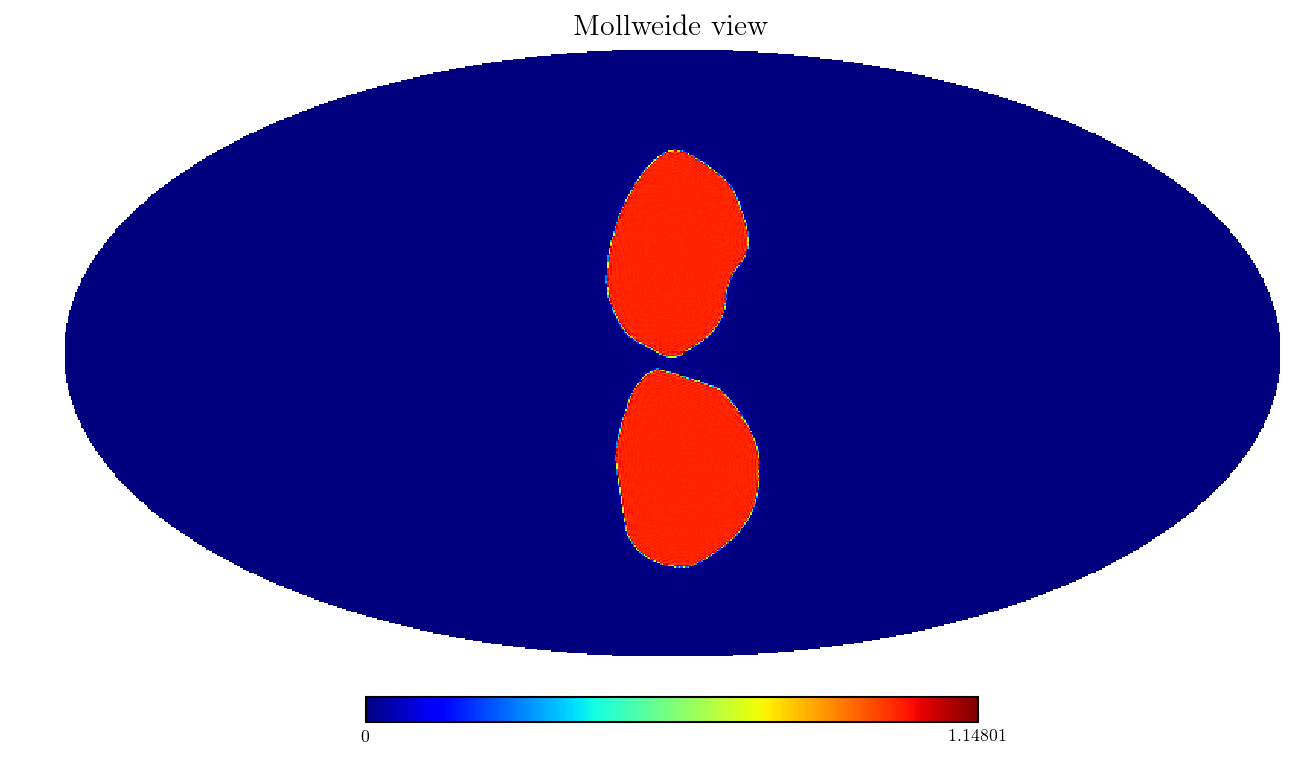

In [28]:
#print hdu[1].data['NAME']


import healpy
healpy.mollview(hdu[1].data['TEMPLATE'][bub_idx][0])


def AddFermiBubbleTemplate(templateFile='./bubble_templates_diskcut30.0.fits', specFile='./reduced_bubble_spec_apj_793_64.dat'):
    """
    Adds a fermi bubble template to the template stack.    
    
    :param templateFile: Requires file 'bubble_templates_diskcut30.0.fits'
        style file (from Su & Finkbeiner) with an extension table with a NAME column containing "Whole bubble"
        and a TEMPLATE column with an order 8 healpix array.
    :param specFile: filename containing two columns (no header).  First col is energy in MeV, second is 
        dN/dE in units (s cm^2 sr MeV)^-1.
    :param fixSpectrum: If True, the spectrum is not allowed to float. 
    """
    
    # Load the template and spectrum
    hdu = pyfits.open('./bubble_templates_diskcut30.0.fits')
    bub_idx = np.where(hdu[1].data['NAME']=='Whole bubble')
    bubble = hdu[1].data['TEMPLATE'][bub_idx][0]
    E, dnde = np.genfromtxt(specfile).T
    
    # Determine the counts in each bin. 
    effArea = Tools.genfromtxt
    spec = lambda e: np.interp(e, E, dnde)
    

    

In [56]:
data = np.genfromtxt('./bubble_spec_apj_793_64.dat', skip_header=1).T

E = data[0]*1e3
SED = data[3]*1e3/1e7
unc_SED = np.max((data[3]-data[4],data[5]-data[3]), axis=0)*1e3/1e7/2

np.savetxt('./reduced_bubble_spec_apj_793_64.dat', np.transpose((E,SED/E**2, unc_SED/E**2)))
np.genfromtxt('./reduced_bubble_spec_apj_793_64.dat').T






array([[  1.20000000e+02,   1.70000000e+02,   2.40000000e+02,
          3.40000000e+02,   4.80000000e+02,   6.70000000e+02,
          9.50000000e+02,   1.35000000e+03,   1.90000000e+03,
          2.69000000e+03,   3.81000000e+03,   5.38000000e+03,
          7.61000000e+03,   1.07600000e+04,   1.52200000e+04,
          2.15300000e+04,   3.04400000e+04,   4.30500000e+04,
          6.08900000e+04,   8.61100000e+04,   1.21770000e+05,
          1.72220000e+05,   2.43550000e+05,   3.44430000e+05,
          4.87100000e+05],
       [  1.28472222e-08,   8.89273356e-09,   5.05208333e-09,
          3.03633218e-09,   1.67100694e-09,   9.69035420e-10,
          4.72022161e-10,   2.48559671e-10,   1.36011080e-10,
          7.46258344e-11,   3.32733999e-11,   1.71363027e-11,
          1.04468669e-11,   5.21689861e-12,   2.40882303e-12,
          1.19083343e-12,   4.82412138e-13,   2.61155424e-13,
          1.20023991e-13,   4.70671876e-14,   2.36715395e-14,
          6.97916034e-15,   1.80387945e-15,

In [61]:
data = np.genfromtxt('./modelA_integrated_fluxes.txt', skip_header=1).T
E = 10**(0.5*(np.log10(data[0])+np.log10(data[1])))
np.savetxt('./IGRB_ackerman_2014_modA.dat', np.transpose((E, data[2]/(data[1]-data[0]),data[3]/(data[1]-data[0]))))

print data[2]/(data[1]-data[0])
print data[3]/(data[1]-data[0])

data = np.genfromtxt('./modelB_integrated_fluxes.txt', skip_header=1).T
E = 10**(0.5*(np.log10(data[0])+np.log10(data[1])))
np.savetxt('./IGRB_ackerman_2014_modB.dat', np.transpose((E, data[2]/(data[1]-data[0]),data[3]/(data[1]-data[0]))))

data = np.genfromtxt('./modelC_integrated_fluxes.txt', skip_header=1).T
E = 10**(0.5*(np.log10(data[0])+np.log10(data[1])))
np.savetxt('./IGRB_ackerman_2014_modC.dat', np.transpose((E, data[2]/(data[1]-data[0]),data[3]/(data[1]-data[0]))))



[  6.68840580e-08   2.90273038e-08   1.27657005e-08   5.67406143e-09
   2.70730235e-09   1.38967136e-09   5.82981291e-10   2.28126334e-10
   9.09913988e-11   4.19502827e-11   1.75782724e-11   7.79407842e-12
   3.61410788e-12   2.03227527e-12   7.61802373e-13   3.53289500e-13
   1.46266940e-13   7.00848887e-14   2.98995176e-14   1.20230859e-14
   3.64489397e-15   1.63225500e-15   5.55929502e-16   2.66485287e-16
   4.32035713e-17   1.75295212e-19]
[  1.33067633e-08   7.36518771e-09   3.73429952e-09   1.69795222e-09
   6.07724804e-10   1.72001707e-10   6.61738081e-11   2.74221084e-11
   1.23917308e-11   4.42547744e-12   2.27838551e-12   1.27180581e-12
   5.56393814e-13   2.63616965e-13   1.00869500e-13   4.35443646e-14
   1.77859090e-14   8.32883216e-15   3.73449266e-15   1.66609430e-15
   6.76875199e-16   3.40087856e-16   1.60790467e-16   9.06066645e-17
   3.33663598e-17   9.31073473e-18]


['Uniform' 'SFD dust' 'Haslam' 'Simple disk' 'North bubble' 'South bubble'
 'Bubble interior' 'Bubble shell' 'Loop I' 'Whole bubble' ''
 '0.5 - 1.0 GeV Fermi map' 'North bubble shell' 'North bubble interior'
 'North bubble left shell' 'North bubble rest shell' ''
 'South bubble shell' 'South bubble interior' 'Outside bubble shell'
 'North central small bubble' 'North transition shell'
 'South central small bubble' 'South transition shell' 'Docut']


/home/carlson/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10


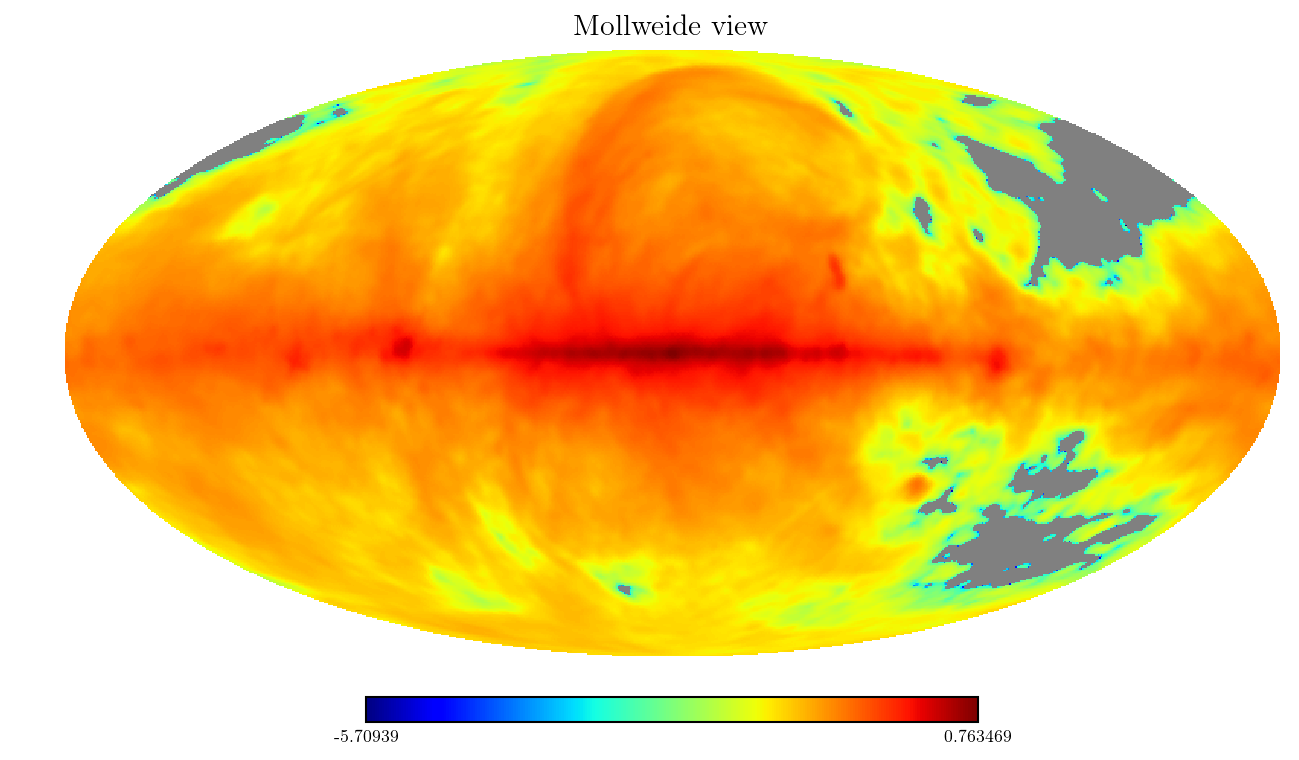

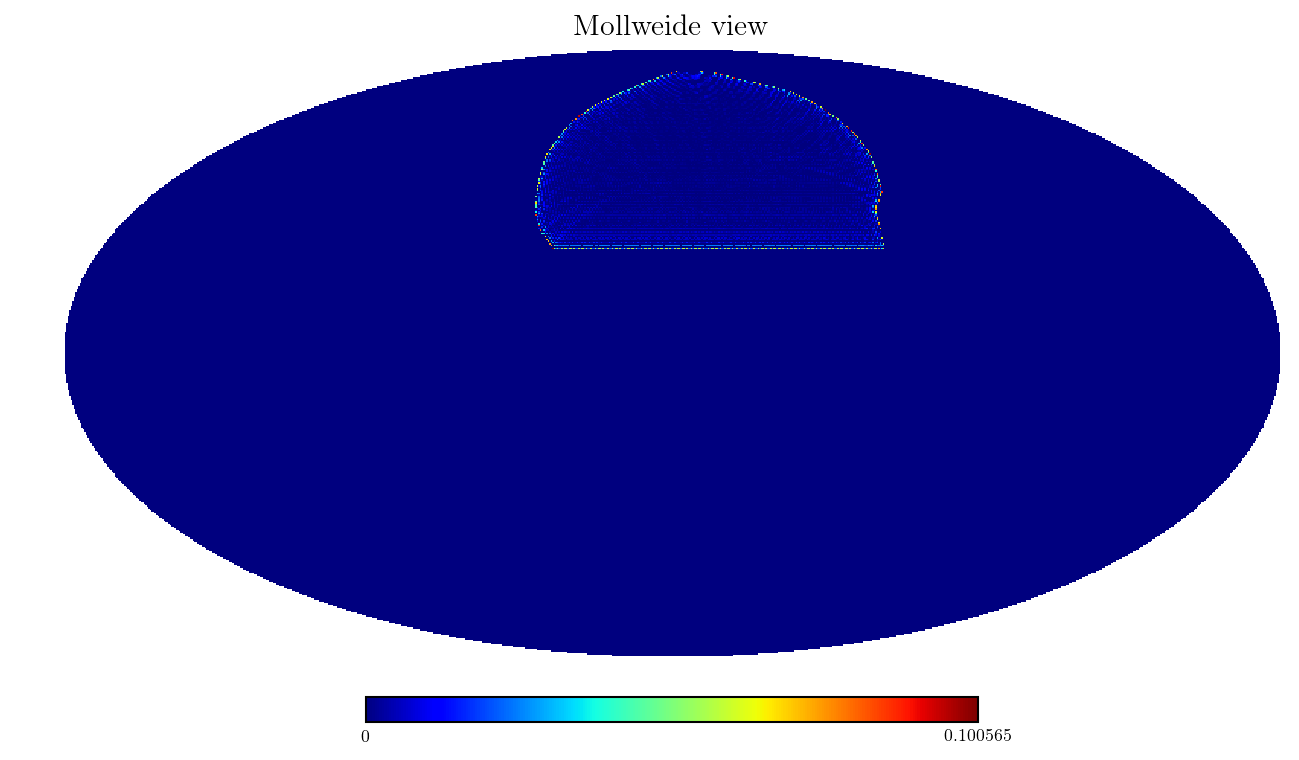

In [19]:
h = pyfits.open('./bubble_templates_diskcut30.0.fits')[1]
print h.data['name']
import healpy
healpy.mollview(np.log10(h.data['template'][2]))


mask = h.data['template'][8]
mask[mask == 0] = 1


healpy.mollview(np.log10(h.data['template'][8]*mask),min=0)



In [20]:

h = pyfits.open('../nugget_dm/labh.fit.gz')
h.info()
print h[0].header.cards


Filename: ../nugget_dm/labh.fit.gz
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      75   (721, 361, 891)   int16   
('SIMPLE', True, 'file does conform to FITS standard')
('BITPIX', 16, 'number of bits per data pixel')
('NAXIS', 3, 'number of data axes')
('NAXIS1', 721, 'length of data axis 1')
('NAXIS2', 361, 'length of data axis 2')
('NAXIS3', 891, 'length of data axis 3')
('COMMENT', "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", '')
('COMMENT', "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", '')
('CTYPE1', 'GLON-CAR', 'axis type')
('CRVAL1', 180.0, 'longitude')
('CRPIX1', 1, 'ref pixel')
('CDELT1', -0.5, 'longitude increment')
('CROTA1', 0.0, 'longitude rotation')
('CUNIT1', 'DEG', 'unit type')
('CTYPE2', 'GLAT-CAR', 'axis type')
('CRVAL2', -90.0, 'latitude')
('CRPIX2', 1, 'ref pixel')
('CDELT2', 0.5, 'longitude increment')
('CROTA2', 0.0, 'latitude rotation')
('CUNIT2', 'DEG', 'unit t